Hospital Readmissions Data Analysis and Recommendations for Reduction

Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS)
began reducing Medicare payments for Inpatient Prospective Payment System hospitals
with excess readmissions. Excess readmissions are measured by a ratio, by dividing
a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure,
and pneumonia by the number that would be “expected,” based on an average hospital
with similar patients. A ratio greater than 1 indicates excess readmissions.


Exercises

In this exercise, you will:
  critique a preliminary analysis of readmissions data and recommendations (provided below) for
      reducing the readmissions rate. 
  
  construct a statistically sound analysis and make recommendations of your own
  
  
  A. Do you agree with the above analysis and recommendations? Why or why not?
  B. Provide support for your arguments and your own recommendations with a statistically sound
     analysis:
     1-Setup an appropriate hypothesis test.
     2-Compute and report the observed significance value (or p-value).
     3-Report statistical significance for α = .01. 
     4-Discuss statistical significance and practical significance. Do they differ here?
       How does this change your recommendation to the client?
     5-Look at the scatterplot above. 
        -What are the advantages and disadvantages of using this plot to convey information?
        -Construct another plot that conveys the same information in a more direct manner.

In [1]:
# import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data file
hospital_read_df = pd.read_csv('C:/Users/rivas/OneDrive/Documents/JMR/Education/Springboard/Projects/Reduce HRU/data/cms_hospital_readmissions.csv')


In [3]:
print(hospital_read_df.shape)


(16860, 12)


In [4]:
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')


C:\Users\rivas\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


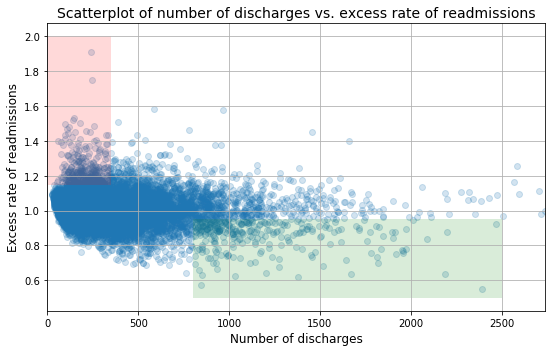

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()


Preliminary Report
   Read the following results/report. While you are reading it, think about if
   the conclusions are correct, incorrect, misleading or unfounded. Think about
   what you would change or what additional analyses you would perform.

A. Initial observations based on the plot above
   Overall, rate of readmissions is trending down with increasing number of discharges

   With lower number of discharges, there is a greater incidence of excess rate of
   readmissions (area shaded red)

   With higher number of discharges, there is a greater incidence of lower rates of
   readmissions (area shaded green) 

B. Statistics
   In hospitals/facilities with number of discharges < 100, mean excess
   readmission rate is 1.023 and 63% have excess readmission rate greater than 1 

   In hospitals/facilities with number of discharges > 1000, mean excess
   readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

C. Conclusions
   There is a significant correlation between hospital capacity (number of discharges)
   and readmission rates. 

   Smaller hospitals/facilities may be lacking necessary resources to ensure quality care
   and prevent complications that lead to readmissions.

D. Regulatory policy recommendations
   Hospitals/facilties with small capacity (< 300) should be required to demonstrate
   upgraded resource allocation for quality care to continue operation.
   
   Directives and incentives should be provided for consolidation of hospitals and facilities
   to have a smaller number of them with higher capacity and number of discharges.

In [8]:
# EDA
print("info")
print(clean_hospital_read_df.info())
print("")
print("shape")
print(hospital_read_df.shape)
print("")
print("describe")
print(clean_hospital_read_df['Number of Discharges'].describe())
print("")
print(" sum of nulls")
print(clean_hospital_read_df['Number of Discharges'].isnull().sum())


info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB
None

shape
(16860, 12)

describe
count    11578.000000
mean       362.909397
std        309.176945
min          0.000000
25%        157.000000
50%        280.000000
75%        472.75000

Confirmation of stats given above
   In hospitals/facilities with number of discharges < 100, mean excess
   readmission rate is 1.023 and 63% have excess readmission rate greater than 1 

   In hospitals/facilities with number of discharges > 1000, mean excess
   readmission rate is 0.978 and 44% have excess readmission rate greater than 1


In [37]:
size100 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 0) & (clean_hospital_read_df['Number of Discharges'] < 100)]
size1000 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 1000)]
print("The number of hospitals with a number of discharges < 100 is :",len(size100))
print("The number of hospitals with a number of discharges > 100 is :",len(size1000))

The number of hospitals with a number of discharges < 100 is : 1188
The number of hospitals with a number of discharges > 100 is : 463


In [38]:
# Ratio greater than 1 size 100
a= len(size100)
b= len(size100[(size100['Excess Readmission Ratio']>1)])
percent100=round((float(b)/a)*100,0)
mean100 = round(np.mean(size100['Excess Readmission Ratio']),4)
print('The mean of excess readmission rate is : ',mean100,' and the excess readmition rate is: ',percent100, '%')

The mean of excess readmission rate is :  1.0226  and the excess readmition rate is:  63.0 %


In [39]:
# Ratio greater than 1 size 1000
a= len(size1000)
b= len(size1000[(size1000['Excess Readmission Ratio']>1)])
percent1000=round((float(b)/a)*100,0)
mean1000 = round(np.mean(size1000['Excess Readmission Ratio']),4)
print('The mean of excess readmission rate is : ',mean1000,' and the excess readmition rate is: ',percent1000, '%')

The mean of excess readmission rate is :  0.9783  and the excess readmition rate is:  44.0 %


A. Do you agree with the above analysis and recommendations? Why or why not?

   The scatter graph does show some correlation between the readmissions and increasing number of
   discharges.  It is a downward trend.

   However:
      it does not provide statistical evidence by presenting the mean and
      percentage of excess readmission rate that is grater than 1
      
      The two sizes evulated does not include the majority of the population

      Other factores besides those initial sizes of the facilities i.e. state, should be considered.

      The recommendation should be based on a broad look

B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

1 -  Setup an appropriate hypothesis test.

     H0 - There is no significant correlation between number of discharges and readmission rates
     H1 - There is significant correlation between number of discharges and readmission rates



In [12]:
# Get Correlation value
wrk_area = clean_hospital_read_df[clean_hospital_read_df['Number of Readmissions'].notnull()]
corr_wrk_area = wrk_area.corr()
print(corr_wrk_area.loc["Excess Readmission Ratio","Number of Discharges"])


-0.0973979435108


Calculation p-value and comparing with threshold of alpha=0.05
     pearson correlation coefficient, t-statitic 

In [14]:
# Tvalue
n = len(wrk_area)
n_2 = n-2
r = corr_wrk_area.loc["Excess Readmission Ratio","Number of Discharges"]
r2 = r**2

tval=(r*((n_2)/(1-r2))**0.5)
print('n: ',n_2, ' tval: ',tval)


n:  11495  tval:  -10.4923808134


In [15]:
# two-sided pvalue = Prob(abs(t)>tt)
import scipy.stats as stats 
pval = stats.t.sf(np.abs(tval), n_2)*2  
print('Correlation: ', corr_wrk_area.loc["Excess Readmission Ratio","Number of Discharges"], ' P-value: ',pval)

Correlation:  -0.0973979435108  P-value:  1.22254737767e-25


2 -  Compute and report the observed significance value (or p-value).

     pvalue < 0.05 so we can reject H0 and accept H1:
       There is significant correlation between hospital capacity and excess readmission ratio.

     The correlation coefficient (-0.0973979435108) for number of discharges and 
       excess readmission rate is statistically significant representing a negative correlation

     Looking at the r2 (pearson correlation coefficient squared) which is <1%, this means only <1%
       of variability in the exess readmission ratio can be explained by number of discharges.
       
       

3 -  Report statistical significance for α = .01.


     The statistical significance for α =.01 will be the same as when α =.05
     because p_value will be calculated the same way.
     p_value = 1.2224686234119185e-25
     

statistical significance and practical significance

In [16]:
# subset by Ratio <=1 and > 1
err1=wrk_area[wrk_area['Excess Readmission Ratio']<=1]
err2=wrk_area[wrk_area['Excess Readmission Ratio']>1]
print(err1.shape, err2.shape)

(5558, 12) (5939, 12)


Graph

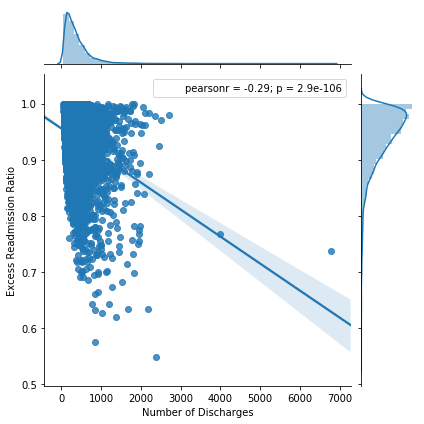

In [17]:
# 'Excess Readmission Ratio <=1'
sns.jointplot('Number of Discharges','Excess Readmission Ratio', data=err1, kind='reg')

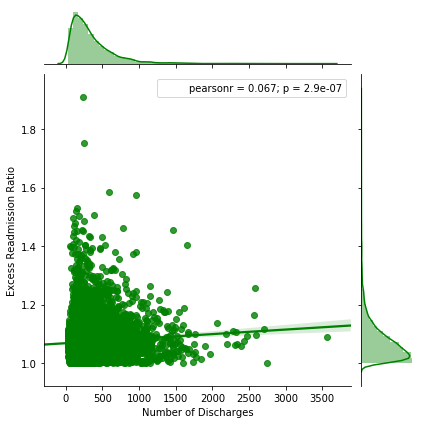

In [18]:
# 'Excess Readmission Ratio >1'
sns.jointplot('Number of Discharges','Excess Readmission Ratio', data=err2, kind='reg', color="g")

In [40]:
# subset by 'Number of Discharges'
size100 = wrk_area[(wrk_area['Number of Discharges'] > 0) & (wrk_area['Number of Discharges'] < 100)]
sizemid = wrk_area[(wrk_area['Number of Discharges'] >=  100) & (wrk_area['Number of Discharges'] <= 1000)]
size1000 = wrk_area[(wrk_area['Number of Discharges'] > 1000)]
print('size100: ', len(size100), '  sizemid: ', len(sizemid), '  size1000: ', len(size1000))

size100:  1188   sizemid:  9846   size1000:  463


Graph

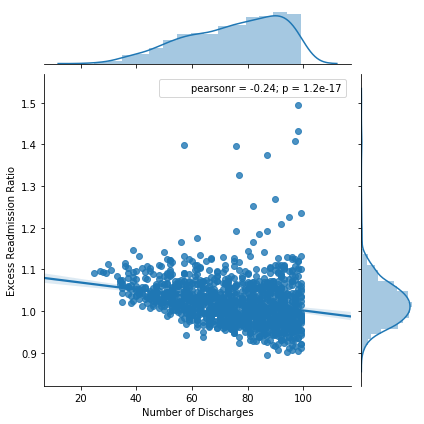

In [41]:
# size < 100
sns.jointplot('Number of Discharges','Excess Readmission Ratio', data=size100, kind='reg')

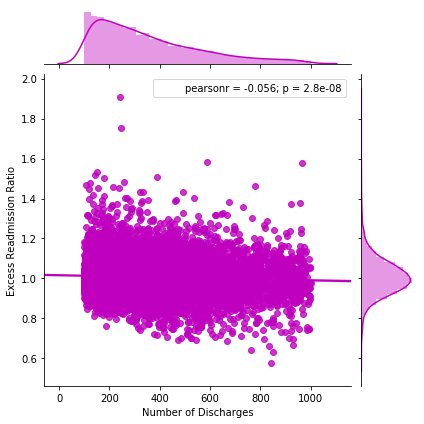

In [42]:
# size >= 100 and <= 1000
sns.jointplot('Number of Discharges','Excess Readmission Ratio', data=sizemid, kind='reg', color="m")

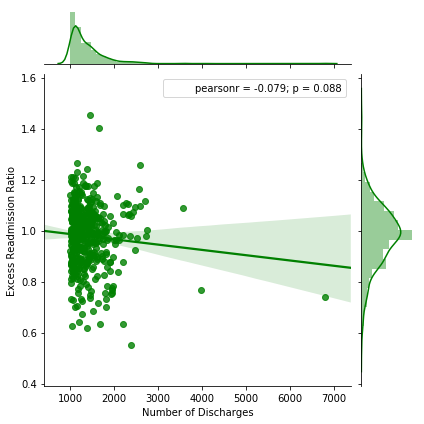

In [43]:
# size > 1000
sns.jointplot('Number of Discharges','Excess Readmission Ratio', data=size1000, kind='reg', color="g")

4 -  Discuss statistical significance and practical significance.

     Looking at the data independently from the preliminary report,
     divided the dataset into two sets.
        excess readmission ration of <=1 
        excess readmission ratio >1 

     There is significant difference between "number of discharges" for hospitals with
     exess readmission ratio <=1 and those with excess readmission ratio >1


     Looking at the data independently from the preliminary report,
     divided the dataset into three sets by 'Number of Discharges'
        size < 100: 
        size >= 100 and <= 1000:
        size > 1000:
     
     Consistent within the three groups a negative correlation between
     number of discharges and excess readmission ratio


     5-Look at the scatterplot above. 
        -What are the advantages and disadvantages of using this plot to convey information?

        Advantages of Scatter plots:
            Show a relationship and a trend in the data relationship.
            Show all data points, including minimum and maximum and outliers.
            Can highlight correlations.
            Retains the exact data values and sample size.
            Shows both positive and negative type of graphical correlation.

        Disadvantages of Scatter Plots:
            Flat best-fit line gives inconclusive results.
            Interpretation can be subjective.
            Correlation does not mean and not show causation.

        
        -Construct another plot that conveys the same information in a more direct manner.
             Replace the scatterplot with a joint histogram using hexagonal bins

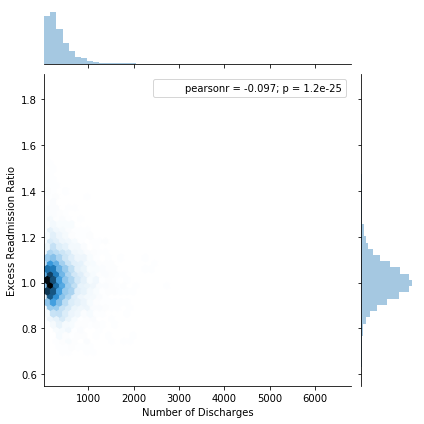

In [23]:
# Replace the scatterplot with a joint histogram using hexagonal bin
sns.jointplot('Number of Discharges','Excess Readmission Ratio', data=clean_hospital_read_df, kind="hex")

A different look at the data

In [27]:
# Data subset by states

x = list(clean_hospital_read_df['State'][81:-3])
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

x = pd.DataFrame(x)
y = pd.DataFrame(y)

df = pd.concat([x,y], axis=1)
df.columns = ['State', 'Excess Readmission Ratio']
df = df.groupby('State').mean().reset_index()

#  top and bottom 10 states with excess readmission rates.
low = df.sort_values(by='Excess Readmission Ratio').head(10)
high= df.sort_values(by='Excess Readmission Ratio').tail(10)

Text(0.5,1,'Top 10 states with low Excess Readmission Ratio')

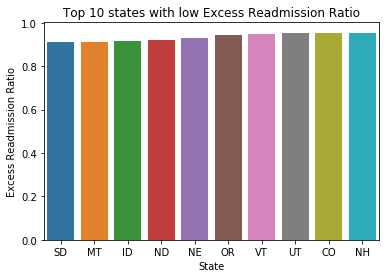

In [28]:
# Graph - Top 10 states with low Excess Readmission Ratio
sns.barplot('State', 'Excess Readmission Ratio', data=low).set_title('Top 10 states with low Excess Readmission Ratio')

Text(0.5,1,'Top 10 states with high Excess Readmission Ratio')

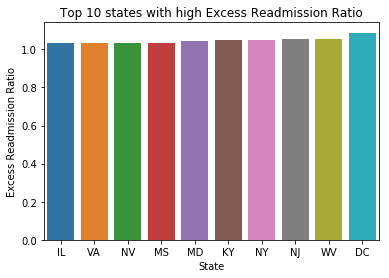

In [29]:
# Graph - Top 10 states with high Excess Readmission Ratio
sns.barplot('State', 'Excess Readmission Ratio', data=high).set_title('Top 10 states with high Excess Readmission Ratio')

In [30]:
# SD - lowest Excess Readmission Ratio  and DC - highest Excess Readmission Ratio
sd=clean_hospital_read_df[clean_hospital_read_df['State'] == 'SD']
dc=clean_hospital_read_df[clean_hospital_read_df['State'] == 'DC']

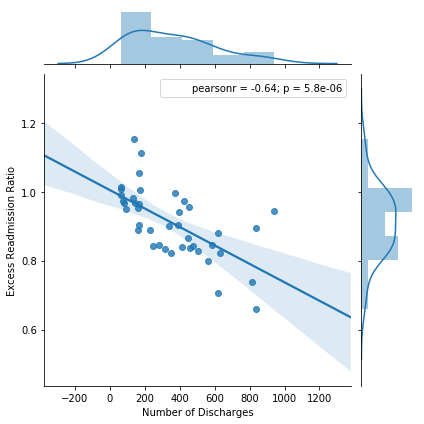

In [31]:
# Graph - SD
sns.jointplot('Number of Discharges','Excess Readmission Ratio', data=sd, kind='reg')

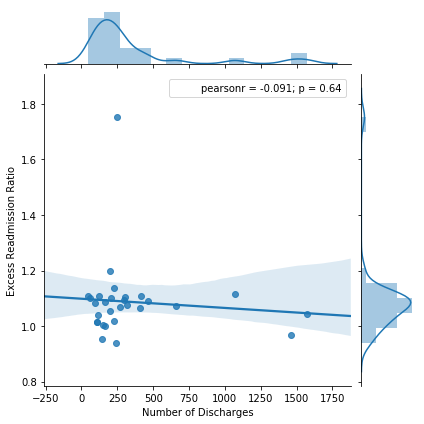

In [32]:
# Graph - DC
sns.jointplot('Number of Discharges','Excess Readmission Ratio', data=dc, kind='reg')

SD has a correlation of -.64
DC has a correlation of -.091

Recommend the states practices (maybe initially focus on the 10 lowest and the 10 highest) be compared to identify the differences in Excess Readmission Ratio